# **MULTI-LAYER PERCEPTRON ON MNIST**
In this session we will do our first classification job. we will use tensor flow as its known to be the ultimate production machine learning framework (unlike pytorch that is research oriented. we will try to classify the hand written numbers given by the mnist using a standard neural network of our own design. this network type is called dense layered network. this is because in every layer all the nodes are connected to the next layer nodes. it’s an interesting type yet it is not always the best architecture.


In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from tensorflow.examples.tutorials.mnist import input_data
import random
%matplotlib inline  
tf.global_variables_initializer
print ("PACKAGES LOADED")

PACKAGES LOADED


# **LOAD MNIST**
The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems. The database is also widely used for training and testing in the field of machine learning. Next we will download it and save it into our drive. Remember, not all datasets allow this smooth download and just like our previous exercise, we probably have to build our own dataset and feed it manually.


In [ ]:
mnist = input_data.read_data_sets('data/', one_hot=True)


Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz


The data looks like this: given how many training samples and testing samples and validation samples.

Training Samples: 55000
Testing Samples: 10000
Validation Samples: 5000
I wills how image for number: 7


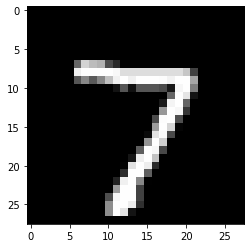

In [ ]:
print ("Training Samples:", mnist.train.num_examples)
print ("Testing Samples:", mnist.test.num_examples)
print ("Validation Samples:", mnist.validation.num_examples)

print ("I wills how image for number:", np.argmax(mnist.test.labels[0]))

plt.imshow(mnist.test.images[0].reshape(28, 28), cmap = cm.Greys_r)

# **DEFINE MODEL**
There are many ways to create a model, the  following way is very basic for illustration purposes. as researchers we wish to use it though because you have great access to all the network components. Other ways are more general and more efficient when it comes to standard tasks. our model consists of 2 hidden layers (first one is 256 nodes and the second is 128 nodes). Our input size is 784, can you guess why? its the multiplication of 28 by 28, every mnist picture size. Our output size is 10 because we have 10 digits (from zero to 9).

Next we initialize the weights across the network randomly and set the bias. Every node in every activation is a function that looks like this:

output  =  sum (weights * inputs) + bias



In [ ]:
# NETWORK TOPOLOGIES
n_hidden_1 = 256 
n_hidden_2 = 128 
n_input    = 784 
n_classes  = 10  

# INPUTS AND OUTPUTS
x = tf.placeholder("float", [None, n_input])
y = tf.placeholder("float", [None, n_classes])

# NETWORK PARAMETERS
stddev = 0.1
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1], stddev=stddev)),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2], stddev=stddev)),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes], stddev=stddev))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}
print ("NETWORK READY")

NETWORK READY


# **MLP AS A FUNCTION**
After we created our model components we have to connect them together. this connection is done by simply giving the network input to the first layer (and al its nodes). The output of the first layer is later given to the second layer. Finally the second layer output is given to the last layer.
the following code simply does the "output = sum (weights * inputs) + bias" we just described

```
# tf.add(tf.matmul(_X, _weights['h1']), _biases['b1'])
```

the sigmoid function is the activation function. There are many activation functions but what units them all is their steps, they have that edge that is used as discriminator between zero and one. it works as filter to represent whether the information being  given is important (so the value of that node will be close to one) or insignificant (so the value of that node will be close to zero)




In [ ]:
def multilayer_perceptron(_X, _weights, _biases):
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(_X, _weights['h1']), _biases['b1'])) 
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, _weights['h2']), _biases['b2']))
    return (tf.matmul(layer_2, _weights['out']) + _biases['out'])

# **DEFINE FUNCTIONS**
After we connected the pieces, the last step before we start the learning is to make sure it will be optimized. by optimization we mean that the network must try to minimize the distance between the desired output and the network real output. This is done -as we illustrated in previous lessons - by the loss function, here we use the [softmax cross entropy](https://peterroelants.github.io/posts/cross-entropy-softmax/) which is very useful in classification tasks. One new component that can optimize the learning is called the optimizer. Its job is to keep searching for the lowest minimum solution that helps the network reaches its purpose. The optimizers are very important. Most famous ones are gradient decent, Adam and SGD.







In [ ]:
# PREDICTION
pred = multilayer_perceptron(x, weights, biases)

# LOSS AND OPTIMIZER
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = pred, labels=y)) 
# optm = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(cost) 
optm = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost) 
corr = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))    
accr = tf.reduce_mean(tf.cast(corr, "float"))

# INITIALIZER
init = tf.initialize_all_variables()
print ("FUNCTIONS READY")

FUNCTIONS READY


# **RUN**
Here we run our model for certain number of epochs and give the network certain number of images (known as the batch size) the bigger the number the more the network will learn. But be careful not to overwhelm the network with data as it may get choked. This will cause what is known as overfitting.


Epoch: 000/020 cost: 0.584828514
TRAIN ACCURACY: 0.920
TEST ACCURACY: 0.927
Epoch: 001/020 cost: 0.216115549
TRAIN ACCURACY: 0.970
TEST ACCURACY: 0.944
Epoch: 002/020 cost: 0.157479076
TRAIN ACCURACY: 0.960
TEST ACCURACY: 0.953
Epoch: 003/020 cost: 0.119296094
TRAIN ACCURACY: 1.000
TEST ACCURACY: 0.965
Epoch: 004/020 cost: 0.093262386
TRAIN ACCURACY: 0.960
TEST ACCURACY: 0.970
Epoch: 005/020 cost: 0.073410725
TRAIN ACCURACY: 0.970
TEST ACCURACY: 0.972
Epoch: 006/020 cost: 0.058169362
TRAIN ACCURACY: 0.980
TEST ACCURACY: 0.974
Epoch: 007/020 cost: 0.046974177
TRAIN ACCURACY: 0.990
TEST ACCURACY: 0.976
Epoch: 008/020 cost: 0.036701201
TRAIN ACCURACY: 0.990
TEST ACCURACY: 0.976
Epoch: 009/020 cost: 0.029243411
TRAIN ACCURACY: 1.000
TEST ACCURACY: 0.979
Epoch: 010/020 cost: 0.023226159
TRAIN ACCURACY: 1.000
TEST ACCURACY: 0.980
Epoch: 011/020 cost: 0.017626688
TRAIN ACCURACY: 0.990
TEST ACCURACY: 0.979
Epoch: 012/020 cost: 0.013993027
TRAIN ACCURACY: 1.000
TEST ACCURACY: 0.980
Epoch: 013/0

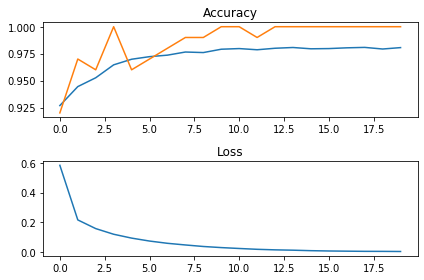

In [ ]:
# PARAMETERS
training_epochs = 20
batch_size      = 100
display_step    = 1
# LAUNCH THE GRAPH
sess = tf.Session()
sess.run(init)
step=[]
TrainingaccuracySteps = []
TestaccuracySteps = []
LossSteps = []

# OPTIMIZE
for epoch in range(training_epochs):
    avg_cost = 0.
    total_batch = int(mnist.train.num_examples/batch_size)
    # ITERATION
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feeds = {x: batch_xs, y: batch_ys}
        sess.run(optm, feed_dict=feeds)
        avg_cost += sess.run(cost, feed_dict=feeds)
    avg_cost = avg_cost / total_batch
    # DISPLAY
    if (epoch+1) % display_step == 0:
        print ("Epoch: %03d/%03d cost: %.9f" % (epoch, training_epochs, avg_cost))
        LossSteps.append(avg_cost)
        feeds = {x: batch_xs, y: batch_ys}
        train_acc = sess.run(accr, feed_dict=feeds)
        TrainingaccuracySteps.append(train_acc)
        print ("TRAIN ACCURACY: %.3f" % (train_acc))
        feeds = {x: mnist.test.images, y: mnist.test.labels}
        test_acc = sess.run(accr, feed_dict=feeds)
        TestaccuracySteps.append(test_acc)
        print ("TEST ACCURACY: %.3f" % (test_acc))
        step.append(epoch)
        # we can save the model per epoch, but lets not waste your valuable space
        #save_path = saver.save(sess, "/tmp/model.ckpt")
        #print("Model saved in path: %s" % save_path)
saver = tf.train.Saver()
save_path = saver.save(sess, "/data/model.ckpt")
print("Model saved in path: %s" % save_path)

plt.subplot(2, 1, 1)
plt.plot(step,TestaccuracySteps, label='Testing Accuracy')
plt.plot(step,TrainingaccuracySteps, label='Testing Accuracy')
plt.title(r"Accuracy")


plt.subplot(2, 1, 2)
plt.plot(step,LossSteps, label='Network Loss')
plt.title(r"Loss")


plt.tight_layout() 
print ("OPTIMIZATION FINISHED")

At the end we plot our results, the loss function must reach zero at some point as it describes how far the network output to the desired output is. And the accuracy describes how many correct predictions the network does while it’s going through the training.
After every training the network must do testing on data that was never used before. This will ensure our learning is always challenging and unbiased.

# **Restoring and using the model**

after we finished our training we can use our model to detect hand written digits in the wild or possibly reuse it again to retrain a better model.

INFO:tensorflow:Restoring parameters from /data/model.ckpt
Model restored.
What is the number in this picture?
I think it is: 6 , Am i right?


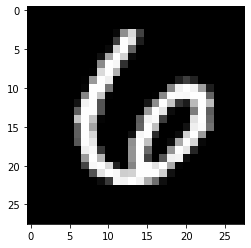

In [ ]:
saver.restore(sess, "/data/model.ckpt")
print("Model restored.")
# lets pick a random number 
testIx = random.randint(0,mnist.test.num_examples-1)
print ("What is the number in this picture?")
plt.imshow(mnist.test.images[testIx].reshape(28, 28), cmap = cm.Greys_r)
feeds = {x: [mnist.test.images[testIx]], y: [mnist.test.labels[testIx]]}
test_acc = sess.run(pred, feed_dict=feeds)
print ("I think it is:", np.argmax(test_acc), ", Am i right?")
